In [33]:
import sqlite3
import os
import pandas as pd
import csv
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
db_file_name = "db/sample-superstore.sqlite"
con = sqlite3.connect(db_file_name)
cur = con.cursor()

In [19]:
def q(sql, cur, convert_to_df=True):
    cur.execute(sql)
    r = cur.fetchall()
    if convert_to_df:
        r.insert(0, next(zip(*cur.description)))
        #display(tabulate.tabulate(r, tablefmt="html", headers="firstrow"))
        return pd.DataFrame(r[1:], columns=r[0])
    else:
        return r

# 1. Orders

## 1.1 Create pandas dataframe

In [39]:
sql = """
    SELECT
        orders.*,
        SUM(sales) AS sales,
        SUM(quantity) AS quantity,
        AVG(discount) AS discount,
        SUM(profit) AS profit,
        SUM(shipping_cost) AS shipping_cost,
        SUM(item_price) AS item_price,
        SUM(item_cost) AS item_cost,
        customers.name AS customer_name,
        cities.name AS customer_city,
        states.name AS customer_state,
        countries.name AS customer_country,
        regions.name AS customer_region
    FROM
        orders
        JOIN order_products ON order_products.order_id = orders.id
        JOIN customers ON orders.customer_id = customers.id
        JOIN cities ON cities.id = customers.city_id
        JOIN states ON states.id = cities.state_id
        JOIN countries ON countries.id = cities.country_id
        JOIN regions ON regions.id = cities.region_id
    GROUP BY orders.id
    ORDER BY orders.order_date
"""
sales_df = q(sql, cur)

# convert dates to pandas datetime
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])
sales_df['ship_date'] = pd.to_datetime(sales_df['ship_date'])

# create new columns


sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25024 entries, 0 to 25023
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                25024 non-null  object        
 1   customer_id       25024 non-null  object        
 2   order_date        25024 non-null  datetime64[ns]
 3   ship_date         25024 non-null  datetime64[ns]
 4   ship_mode         25024 non-null  object        
 5   priority          25024 non-null  object        
 6   is_returned       25024 non-null  int64         
 7   sales             25024 non-null  float64       
 8   quantity          25024 non-null  int64         
 9   discount          25024 non-null  float64       
 10  profit            25024 non-null  float64       
 11  shipping_cost     25024 non-null  float64       
 12  item_price        25024 non-null  float64       
 13  item_cost         25024 non-null  float64       
 14  customer_name     2502

## 1.2 Sales over time

<AxesSubplot: xlabel='order_year_month', ylabel='sales'>

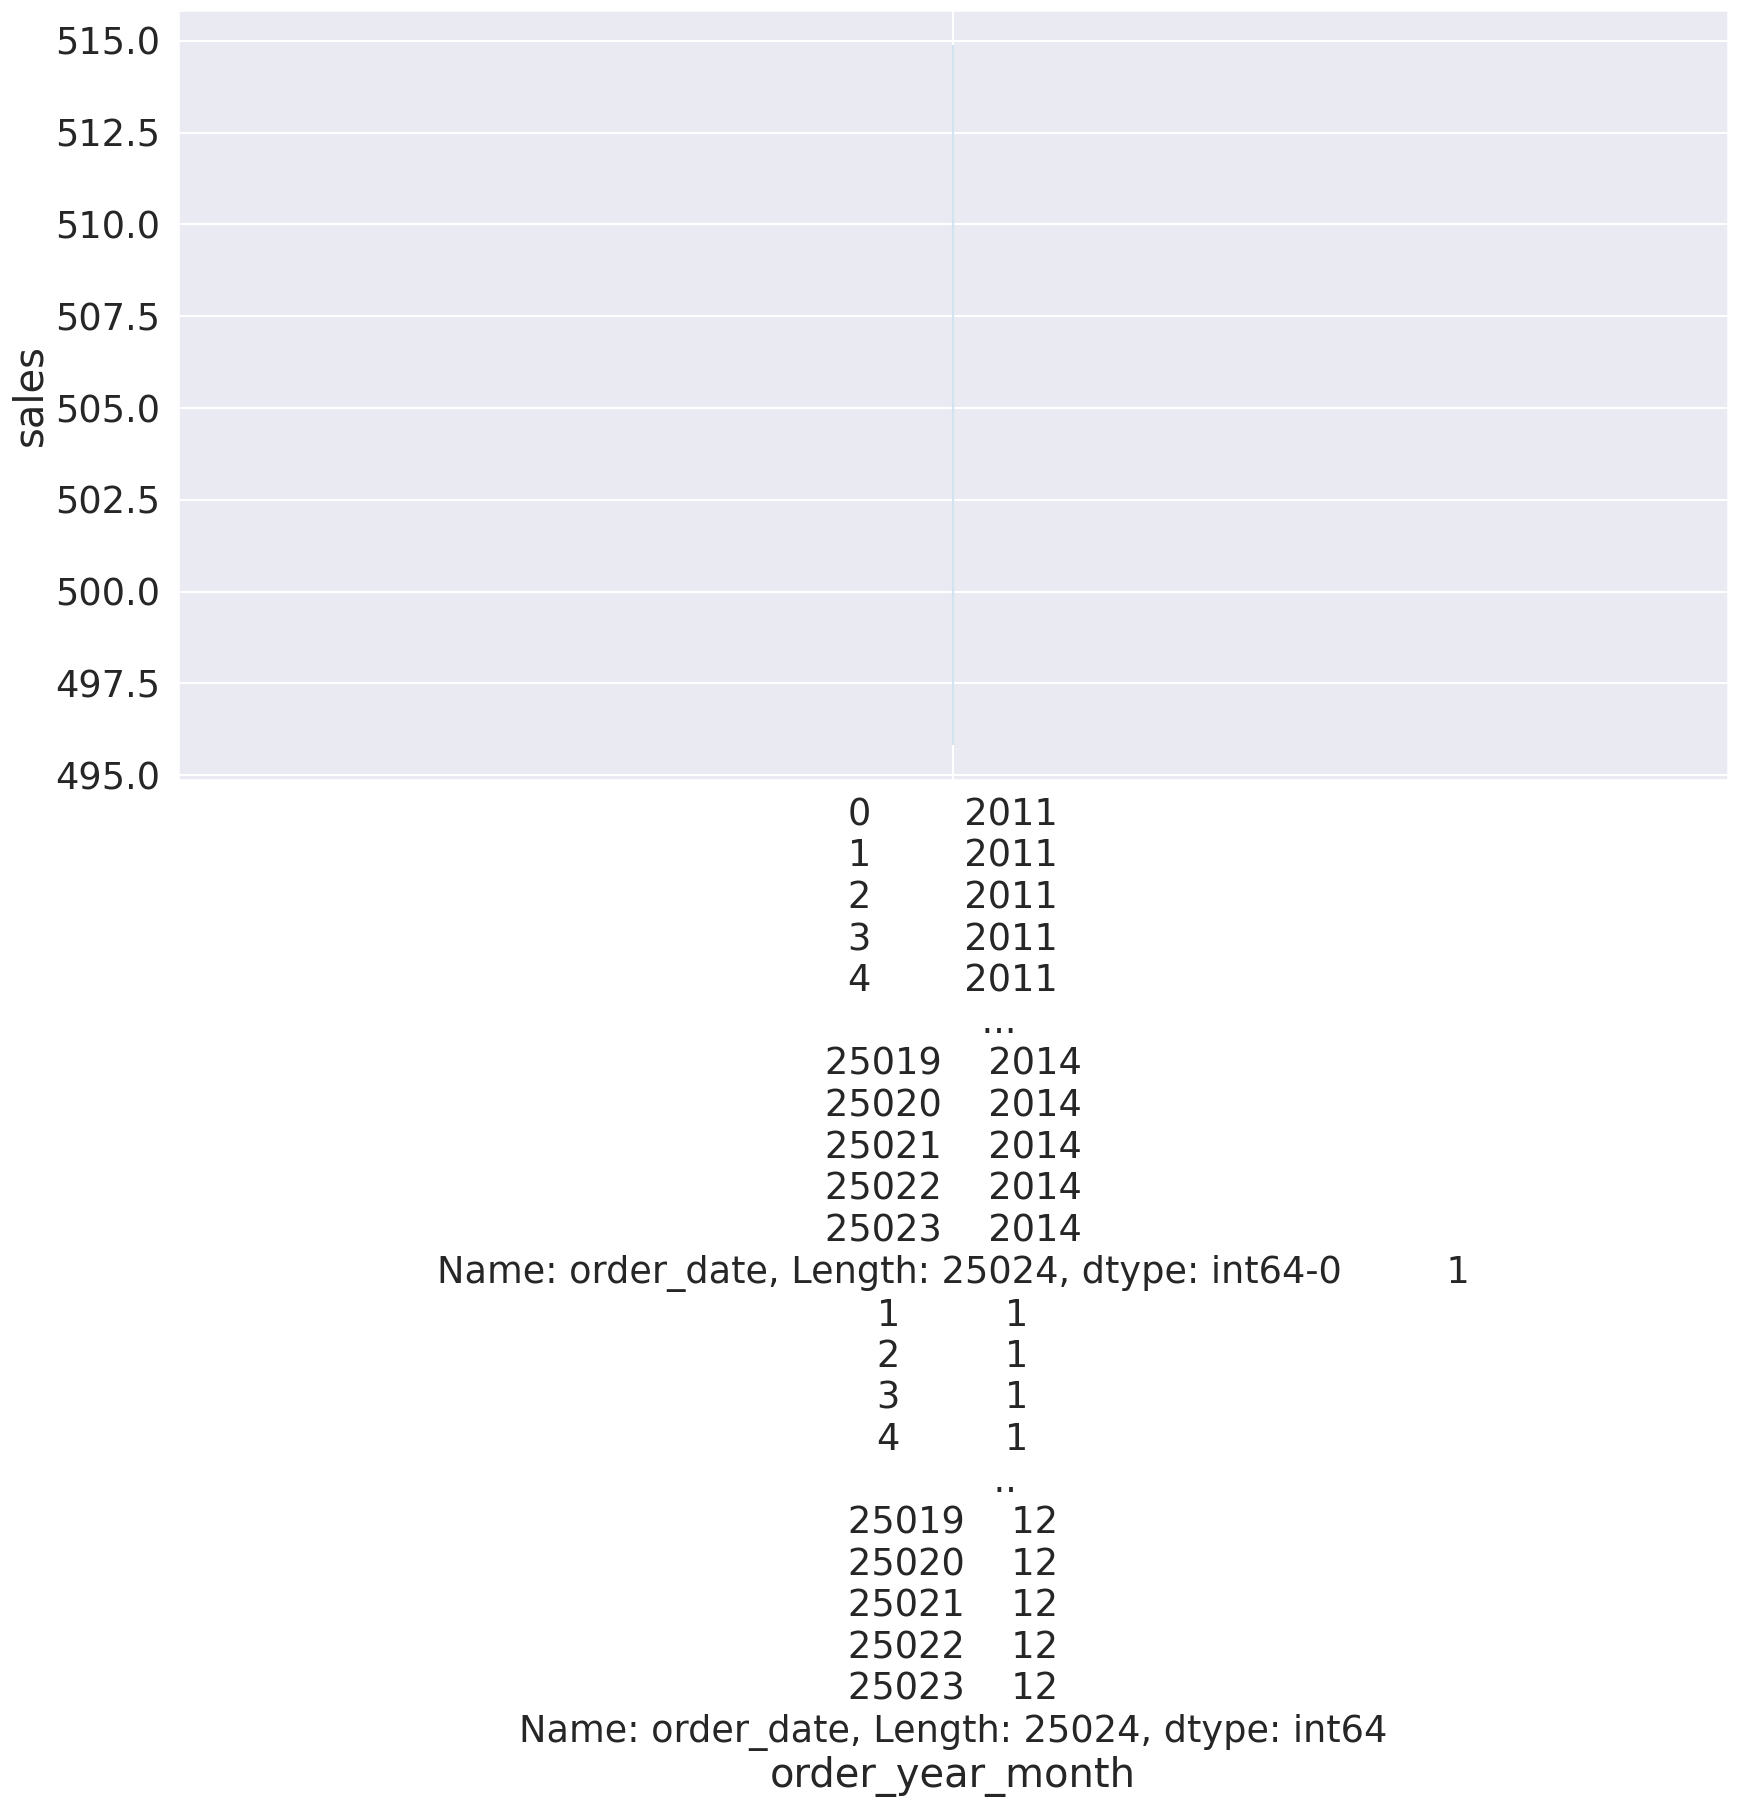

In [40]:
plt.figure(figsize=(20, 10))
sns.set_context('talk', font_scale=1.6)
sns.lineplot(sales_df, x='order_year_month', y='sales')

# 2. Customers